In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2


In [2]:
# Import Image
img = cv.imread('5.jpg',cv.IMREAD_GRAYSCALE)


## Laplacian In the Spatial Domain

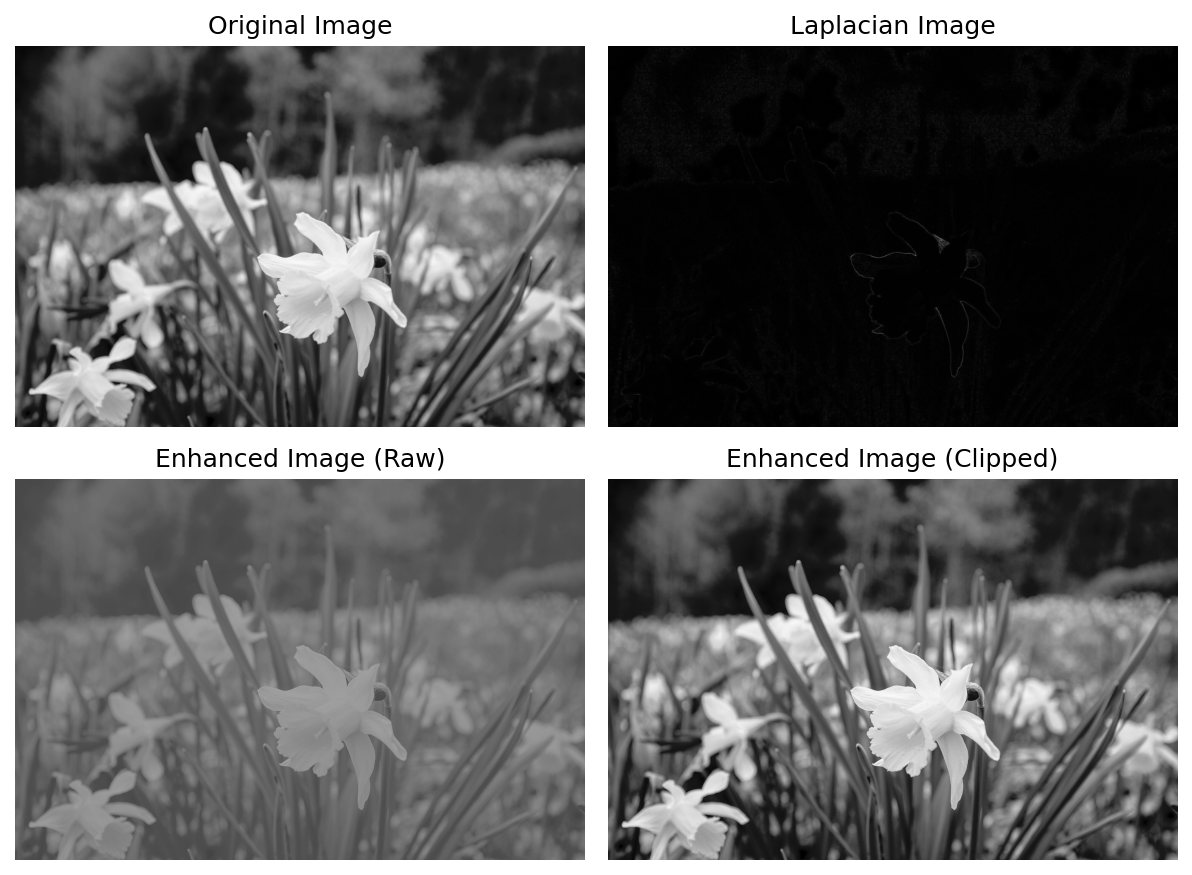

In [4]:
# Apply Laplacian operator
laplacian_spatial = cv.Laplacian(img, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian_spatial)

# Apply processed image
c = -1  # constant value can be 1 too
raw= img + c * laplacian_spatial

# Clip the processed image for Normalization
normal = np.clip(raw, 0, 255).astype(np.uint8)

# Plot all images together
plt.figure(figsize=(12, 6), dpi=150)

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Laplacian image
plt.subplot(2, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Image')
plt.axis('off')

# Raw enhanced image
plt.subplot(2, 3, 4)
plt.imshow(raw, cmap='gray')
plt.title('Enhanced Image (Raw)')
plt.axis('off')

# Clipped enhanced image
plt.subplot(2, 3, 5)
plt.imshow(normal, cmap='gray')
plt.title('Enhanced Image (Clipped)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Laplacian In the Frequency domain

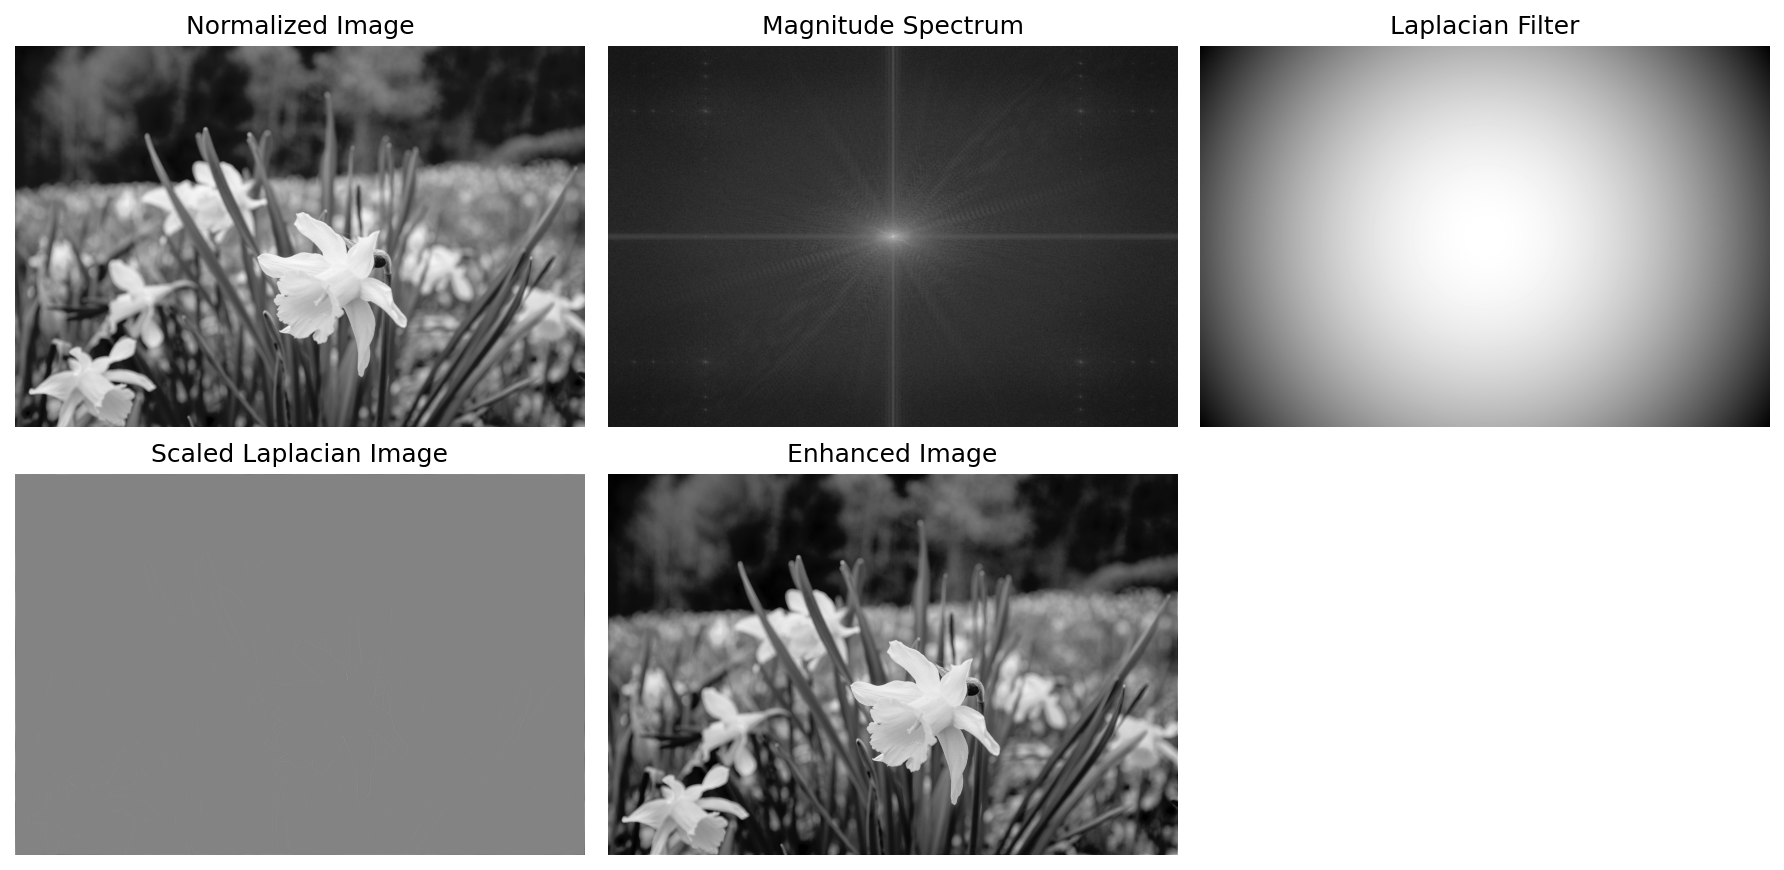

In [5]:
# Normalize the image to range [0, 1]
f = img / 255.0

# Transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

# Laplacian Filter
P, Q = F.shape
H = np.zeros((P, Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u, v] = -4 * np.pi * np.pi * ((u - P/2)**2 + (v - Q/2)**2)

# Apply Laplacian in frequency domain
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# Scale Laplacian Image to range [-1, 1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - (-1)
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + (-1)

# Image enhancement
c = -1
enhanced_image = f + c * LapScaled
enhanced_image = np.clip(enhanced_image, 0, 1)

# Plot all images together
plt.figure(figsize=(12, 6), dpi=150)

# Original image
plt.subplot(2, 3, 1)
plt.imshow(f, cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

# Magnitude spectrum
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Laplacian filter
plt.subplot(2, 3, 3)
plt.imshow(H, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

# Scaled Laplacian image
plt.subplot(2, 3, 4)
plt.imshow(LapScaled, cmap='gray')
plt.title('Scaled Laplacian Image')
plt.axis('off')

# Enhanced image
plt.subplot(2, 3, 5)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Gaussian filtering In the Spatial Domain

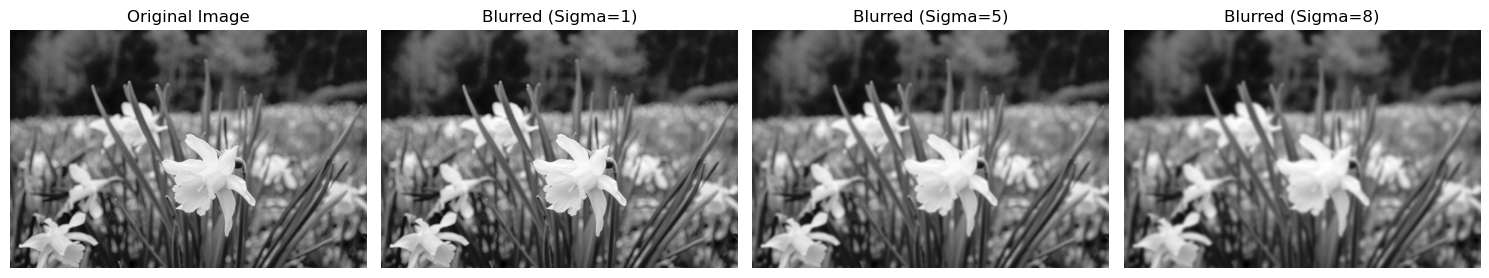

In [6]:
# Different sigma values for Gaussian filter
sigmas = [1, 5, 8]  



plt.figure(figsize=(15, 5))

# Plot the original image
plt.subplot(1, len(sigmas) + 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Loop over sigma values
for i, sigma in enumerate(sigmas):
    # Apply Gaussian blur
    img_blurred = cv.GaussianBlur(img, (0, 0), sigma)

    # Clip the blurred image for visualization
    img_blurred = np.clip(img_blurred, 0, 255).astype(np.uint8)

    # Plot the images
    plt.subplot(1, len(sigmas) + 1, i + 2)
    plt.imshow(img_blurred, cmap='gray')
    plt.title(f'Blurred (Sigma={sigma})')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Gaussian filtering  In the Frequency domain

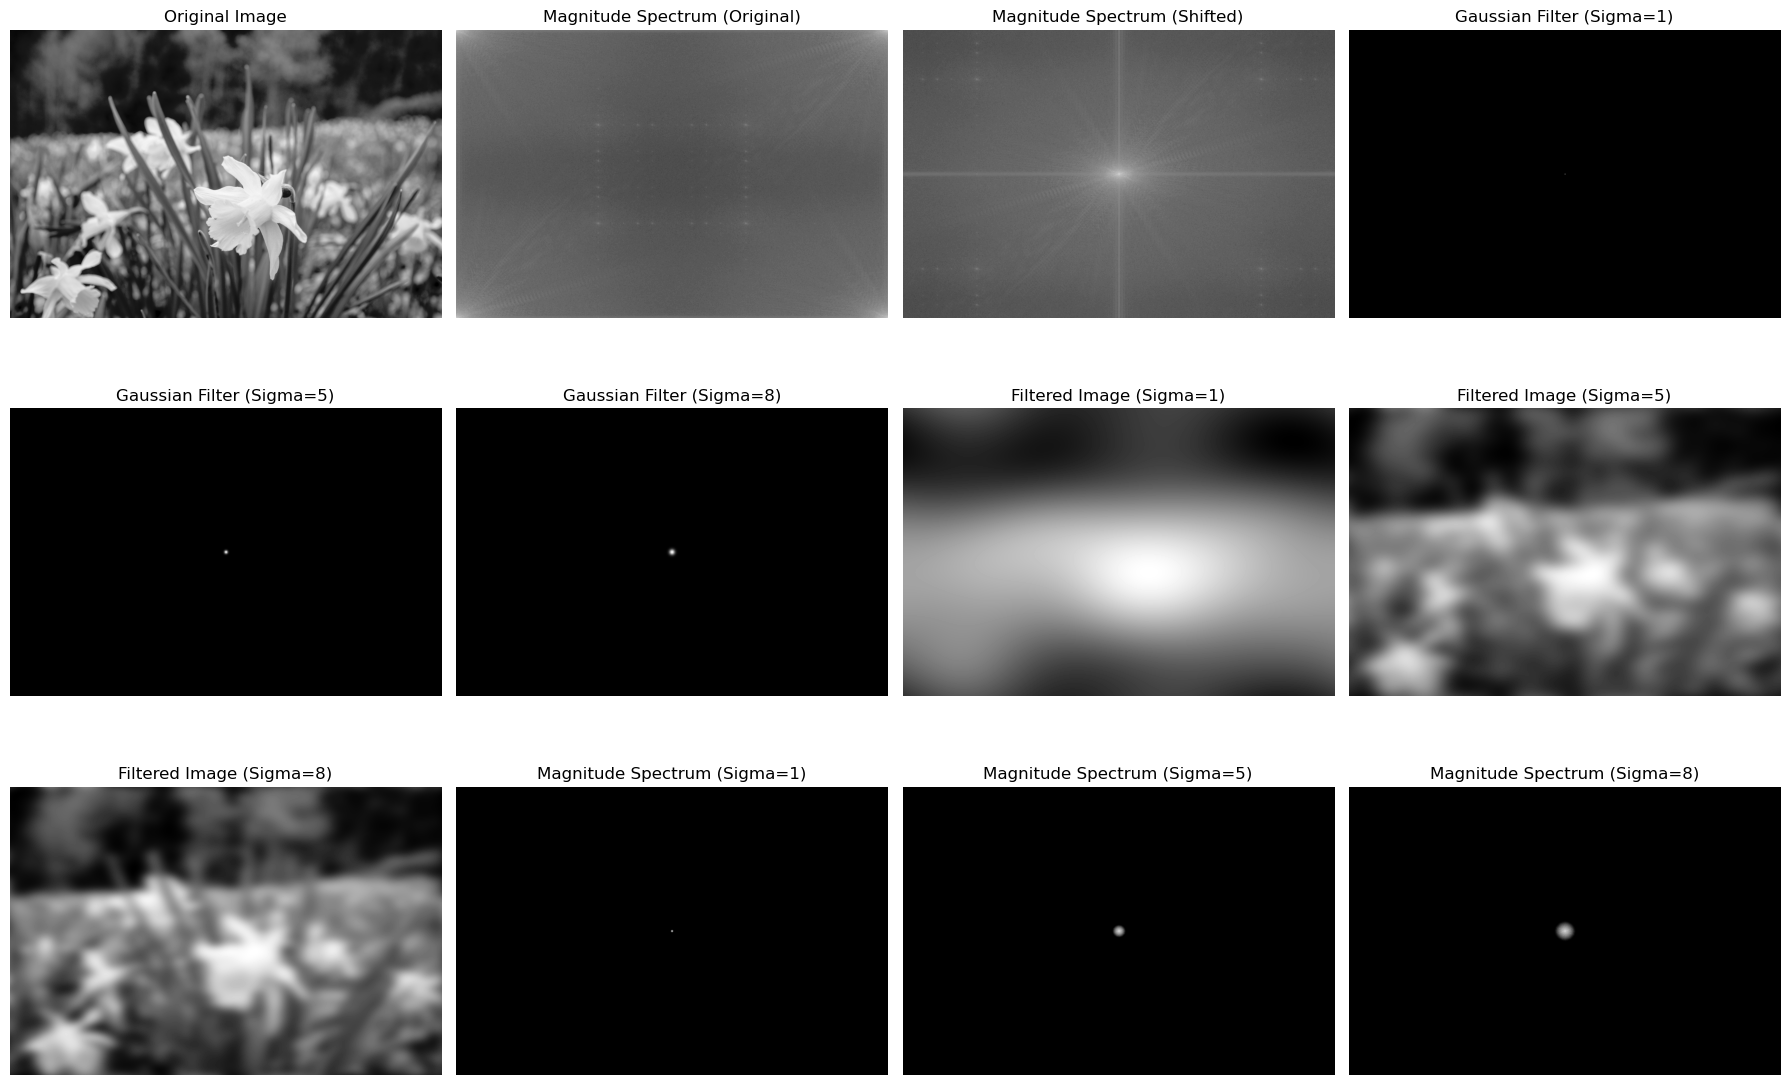

In [7]:
# Display the original image
plt.figure(figsize=(18, 12))
plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transform the image into frequency domain, f --> F
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

# Display magnitude spectrum in frequency domain (Original)
plt.subplot(3, 4, 2)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.title('Magnitude Spectrum (Original)')
plt.axis('off')

# Display magnitude spectrum in frequency domain (Shifted)
plt.subplot(3, 4, 3)
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.title('Magnitude Spectrum (Shifted)')
plt.axis('off')


# Loop over sigma values
for i, sigma in enumerate(sigmas):
    # Create Gaussian Filter: Low Pass Filter
    M, N = img.shape
    H = np.zeros((M, N), dtype=np.float32)
    D0 = 2 * sigma ** 2  # Cutoff frequency

    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
            H[u, v] = np.exp(-D**2 / (2 * D0))

    # Apply Gaussian filter in frequency domain
    Gshift = Fshift * H
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))

    # Display Gaussian filter (Low Pass)
    plt.subplot(3, 4, 4 + i)
    plt.imshow(H, cmap='gray')
    plt.title(f'Gaussian Filter (Sigma={sigma})')
    plt.axis('off')

    # Display filtered image in spatial domain (Low Pass)
    plt.subplot(3, 4, 7 + i)
    plt.imshow(g, cmap='gray')
    plt.title(f'Filtered Image (Sigma={sigma})')
    plt.axis('off')

    # Display magnitude spectrum of filtered image in frequency domain (Low Pass)
    plt.subplot(3, 4, 10 + i)
    plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
    plt.title(f'Magnitude Spectrum (Sigma={sigma})')
    plt.axis('off')

plt.tight_layout()
plt.show()